In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
import seaborn as sb
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


%matplotlib inline

In [2]:
df = pd.read_csv('house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


#### Run multi-variate linear regression on quantitative variables

In [3]:
df['intercept'] = 1

lm = sms.OLS(df['price'], df[['intercept', 'area', 'bedrooms','bathrooms']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:28:33   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Run multi variate linear regression on all variables

In [4]:
df[['A','B','C']] = pd.get_dummies(df['neighborhood'])

In [5]:
df.groupby(['style']).count()

,house_id,neighborhood,area,bedrooms,bathrooms,price,intercept,A,B,C
style,,,,,,,,,,
lodge,1229,1229,1229,1229,1229,1229,1229,1229,1229,1229
ranch,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802
victorian,2997,2997,2997,2997,2997,2997,2997,2997,2997,2997


In [6]:
df[['lodge','ranch','victorian']] = pd.get_dummies(df['style'])

In [7]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1


In [8]:
lm = sms.OLS(df['price'], df[['intercept', 'area', 'bedrooms','bathrooms','A','B','lodge','ranch']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     9801.
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:28:33   Log-Likelihood:                -80346.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6020   BIC:                         1.608e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.166e+05   1.02e+04    -21.233      0.000   -2.37e+05   -1.97e+05
area         343.8899      3.790     90.746      0.000     336.461     351.319
bedrooms    7754.7548   5312.035      1.460      0.144   -2658.736    1.82e+04
bathrooms  -3969.9421   7180.589     -0.553      0.580    -1.8e+04    1.01e+04
A           -109.5333   4965.465     -0.022      0.982   -9843.623    9624.557
B           5.244e+05   4687.373    111.869      0.000    5.15e+05    5.34e+05
lodge       1.351e+04   8236.830      1.641      0.101   -2632.855    2.97e+04
ranch       6190.8233   5484.416      1.129      0.259   -4560.596    1.69e+04
==============================================================================
Omnibus:                      124.889   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.627
Skew:                           0.286   Prob(JB):                     7.20e-34
Kurtosis:                       3.529   Cond. No.                     1.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Run multi variate linear regression on predictor variabes sufficient for best prediction (R^2)

In [9]:
lm = sms.OLS(df['price'], df[['intercept', 'area', 'B']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 3.430e+04
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:28:33   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6025   BIC:                         1.607e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.989e+05   4128.454    -48.173      0.000   -2.07e+05   -1.91e+05
area         347.2235      1.549    224.154      0.000     344.187     350.260
B           5.244e+05   3908.331    134.169      0.000    5.17e+05    5.32e+05
==============================================================================
Omnibus:                      125.346   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.989
Skew:                           0.287   Prob(JB):                     6.01e-34
Kurtosis:                       3.528   Cond. No.                     6.08e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

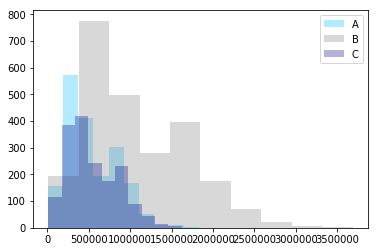

In [10]:
plt.hist(df.query("A == 1")['price'], alpha = 0.3, label = 'A', color = 'deepskyblue')
plt.hist(df.query("B == 1")['price'], alpha = 0.3, label = 'B', color = 'grey')
plt.hist(df.query("C == 1")['price'], alpha = 0.3, label = 'C', color = 'darkblue')

plt.legend();

#### Explore linearly related variables (multicolinearity)

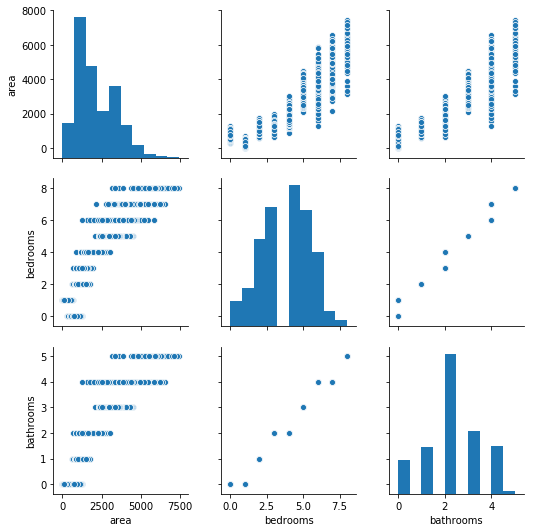

In [11]:
sb.pairplot(df[['area','bedrooms','bathrooms']]);

In [12]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 

In [13]:
vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


#### Adding an interactive variable to test if this improves prediction

In [14]:
# hypothesis here is that greater area has a [bigger] impact on price if the house is located in neighborhood 'B'
df['area_B'] = df['area']*df['B']

In [15]:
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian,area_B
0,1112,B,1188,3,2,ranch,598291,1,0,1,0,0,1,0,1188
1,491,B,3512,5,3,victorian,1744259,1,0,1,0,0,0,1,3512
2,5952,B,1134,3,2,ranch,571669,1,0,1,0,0,1,0,1134
3,3525,A,1940,4,2,ranch,493675,1,1,0,0,0,1,0,0
4,5108,B,2208,6,4,victorian,1101539,1,0,1,0,0,0,1,2208


In [16]:
lm = sms.OLS(df['price'], df[['intercept', 'area', 'B', 'area_B']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.131e+10
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        14:28:34   Log-Likelihood:                -35989.
No. Observations:                6028   AIC:                         7.199e+04
Df Residuals:                    6024   BIC:                         7.201e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.22e+04      3.149   3873.375      0.000    1.22e+04    1.22e+04
area         248.1610      0.001   1.94e+05      0.000     248.158     248.163
B            132.5642      4.971     26.668      0.000     122.820     142.309
area_B       245.0016      0.002   1.22e+05      0.000     244.998     245.006
==============================================================================
Omnibus:                      214.393   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              398.418
Skew:                          -0.277   Prob(JB):                     3.05e-87
Kurtosis:                       4.131   Cond. No.                     1.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R^2 of 1, and all P values near 0, nice**

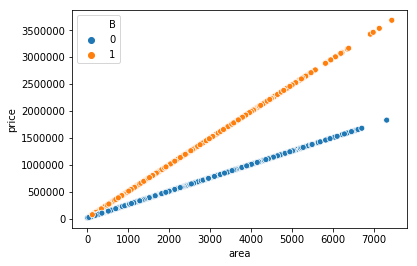

In [17]:
sb.scatterplot(data = df, x = 'area', y = 'price', hue = 'B');

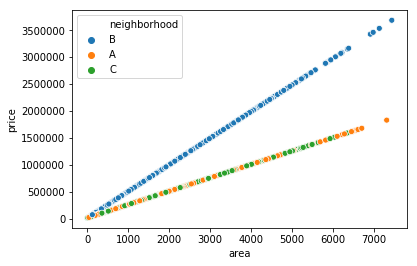

In [20]:
sb.scatterplot(data = df, x = 'area', y = 'price', hue = 'neighborhood');